In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
%matplotlib inline
#https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [2]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



In [3]:
data_train = pd.read_csv("train (2).csv")
data_test = pd.read_csv("test (2).csv")
train_shape = data_train.shape[0]
test_shape = data_test.shape[0]
#%qtconsole

In [4]:
%qtconsole

In [5]:
data = pd.concat([data_train , data_test], keys=['train', 'test'])
#get train and test sets separately
def get_train_test(data):
    train = data.iloc[:train_shape,:]
    test = data.iloc[train_shape:,:]
    return train , test
data.shape

(2919, 81)

In [6]:
data.head(20)

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF CentralAir Condition1 Condition2 Electrical  EnclosedPorch ExterCond ExterQual Exterior1st Exterior2nd  Fence FireplaceQu  Fireplaces Foundation  FullBath Functional  GarageArea  GarageCars GarageCond GarageFinish GarageQual GarageType  GarageYrBlt  GrLivArea  HalfBath Heating HeatingQC HouseStyle  Id  KitchenAbvGr KitchenQual LandContour LandSlope  LotArea LotConfig  LotFrontage LotShape  LowQualFinSF  MSSubClass MSZoning  MasVnrArea MasVnrType MiscFeature  MiscVal  MoSold Neighborhood  OpenPorchSF  OverallCond  OverallQual PavedDrive  PoolArea PoolQC RoofMatl RoofStyle SaleCondition  SalePrice SaleType  ScreenPorch Street  TotRmsAbvGrd  TotalBsmtSF Utilities  WoodDeckSF  YearBuilt  YearRemodAdd  YrSold
train 0        856       854          0   NaN             3     1Fam       TA           No       706.0         0.0          GLQ          Unf           1.0           0.0       Gd      150.0          Y       Norm       Norm      SBrkr              0        TA        Gd     VinylSd     VinylSd    NaN         NaN           0      PConc         2        Typ       548.0         2.0         TA          RFn         TA     Attchd       2003.0       1710         1    GasA        Ex     2Story   1             1          Gd         Lvl       Gtl     8450    Inside         65.0      Reg             0          60       RL       196.0    BrkFace         NaN        0       2      CollgCr           61            5            7          Y         0    NaN  CompShg     Gable        Normal   208500.0       WD            0   Pave             8        856.0    AllPub           0       2003          2003    2008
      1       1262         0          0   NaN             3     1Fam       TA           Gd       978.0         0.0          ALQ          Unf           0.0           1.0       Gd      284.0          Y      Feedr       Norm      SBrkr              0        TA        TA     MetalSd     MetalSd    NaN          TA           1     CBlock         2        Typ       460.0         2.0         TA          RFn         TA     Attchd       1976.0       1262         0    GasA        Ex     1Story   2             1          TA         Lvl       Gtl     9600       FR2         80.0      Reg             0          20       RL         0.0       None         NaN        0       5      Veenker            0            8            6          Y         0    NaN  CompShg     Gable        Normal   181500.0       WD            0   Pave             6       1262.0    AllPub         298       1976          1976    2007
      2        920       866          0   NaN             3     1Fam       TA           Mn       486.0         0.0          GLQ          Unf           1.0           0.0       Gd      434.0          Y       Norm       Norm      SBrkr              0        TA        Gd     VinylSd     VinylSd    NaN          TA           1      PConc         2        Typ       608.0         2.0         TA          RFn         TA     Attchd       2001.0       1786         1    GasA        Ex     2Story   3             1          Gd         Lvl       Gtl    11250    Inside         68.0      IR1             0          60       RL       162.0    BrkFace         NaN        0       9      CollgCr           42            5            7          Y         0    NaN  CompShg     Gable        Normal   223500.0       WD            0   Pave             6        920.0    AllPub           0       2001          2002    2008
      3        961       756          0   NaN             3     1Fam       Gd           No       216.0         0.0          ALQ          Unf           1.0           0.0       TA      540.0          Y       Norm       Norm      SBrkr            272        TA        TA     Wd Sdng     Wd Shng    NaN          Gd           1     BrkTil         1        Typ       642.0         3.0         TA         

In [7]:
NaNs = data.isnull().sum(axis=0)
#range for dropping columns which have too many missing values. 
drop_range = data.shape[0] / 3
NaNs[NaNs > drop_range]

Alley          2721
Fence          2348
FireplaceQu    1420
MiscFeature    2814
PoolQC         2909
SalePrice      1459
dtype: int64

In [8]:
#fill all missing values
def feature_fillna():
    data['Alley'].fillna('NA',inplace=True)
    data['Fence'].fillna('NA',inplace=True)
    data['FireplaceQu'].fillna('NA',inplace=True)
    data['MiscFeature'].fillna('NA',inplace=True)
    data['PoolQC'].fillna('NA',inplace=True)
    data['GarageCond'].fillna('NA',inplace=True)
    data['GarageFinish'].fillna('NA',inplace=True)
    data['GarageType'].fillna('NA',inplace=True)
    data['GarageYrBlt'].fillna('NA',inplace=True)
    data['GarageQual'].fillna('NA',inplace=True)
    data['BsmtCond'].fillna('NA',inplace=True)
    data['BsmtExposure'].fillna('NA',inplace=True)
    data['BsmtFinType1'].fillna('NA',inplace=True)
    data['BsmtFinType2'].fillna('NA',inplace=True)
    data['BsmtQual'].fillna('NA',inplace=True)
    data['LotFrontage'].fillna(0,inplace=True)
    data['MasVnrType'].fillna('None',inplace=True)
    data['MasVnrArea'].fillna(0,inplace=True)
    NaN_columns = [column for column in data.columns if data[column].isnull().sum() != 0 and column != 'SalePrice']
    for column in NaN_columns:
        data[column].fillna(data[column].mode()[0],inplace=True)
    print('Data: Large missing values filled.')
feature_fillna()

Data: Large missing values filled.


In [9]:
NaNs = data.isnull().sum(axis=0)
NaNs[NaNs != 0]

SalePrice    1459
dtype: int64

Now we have no missing values.

In [10]:
import seaborn as sns

In [11]:
data.columns.to_series().groupby(data.dtypes).groups

{dtype('int64'): Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea', 'LowQualFinSF', 'MSSubClass', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold'], dtype='object'),
 dtype('float64'): Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'GarageArea', 'GarageCars', 'LotFrontage', 'MasVnrArea', 'SalePrice', 'TotalBsmtSF'], dtype='object'),
 dtype('O'): Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandCo

In [12]:
data.head()

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF CentralAir Condition1 Condition2 Electrical  EnclosedPorch ExterCond ExterQual Exterior1st Exterior2nd Fence FireplaceQu  Fireplaces Foundation  FullBath Functional  GarageArea  GarageCars GarageCond GarageFinish GarageQual GarageType GarageYrBlt  GrLivArea  HalfBath Heating HeatingQC HouseStyle  Id  KitchenAbvGr KitchenQual LandContour LandSlope  LotArea LotConfig  LotFrontage LotShape  LowQualFinSF  MSSubClass MSZoning  MasVnrArea MasVnrType MiscFeature  MiscVal  MoSold Neighborhood  OpenPorchSF  OverallCond  OverallQual PavedDrive  PoolArea PoolQC RoofMatl RoofStyle SaleCondition  SalePrice SaleType  ScreenPorch Street  TotRmsAbvGrd  TotalBsmtSF Utilities  WoodDeckSF  YearBuilt  YearRemodAdd  YrSold
train 0       856       854          0    NA             3     1Fam       TA           No       706.0         0.0          GLQ          Unf           1.0           0.0       Gd      150.0          Y       Norm       Norm      SBrkr              0        TA        Gd     VinylSd     VinylSd    NA          NA           0      PConc         2        Typ       548.0         2.0         TA          RFn         TA     Attchd        2003       1710         1    GasA        Ex     2Story   1             1          Gd         Lvl       Gtl     8450    Inside         65.0      Reg             0          60       RL       196.0    BrkFace          NA        0       2      CollgCr           61            5            7          Y         0     NA  CompShg     Gable        Normal   208500.0       WD            0   Pave             8        856.0    AllPub           0       2003          2003    2008
      1      1262         0          0    NA             3     1Fam       TA           Gd       978.0         0.0          ALQ          Unf           0.0           1.0       Gd      284.0          Y      Feedr       Norm      SBrkr              0        TA        TA     MetalSd     MetalSd    NA          TA           1     CBlock         2        Typ       460.0         2.0         TA          RFn         TA     Attchd        1976       1262         0    GasA        Ex     1Story   2             1          TA         Lvl       Gtl     9600       FR2         80.0      Reg             0          20       RL         0.0       None          NA        0       5      Veenker            0            8            6          Y         0     NA  CompShg     Gable        Normal   181500.0       WD            0   Pave             6       1262.0    AllPub         298       1976          1976    2007
      2       920       866          0    NA             3     1Fam       TA           Mn       486.0         0.0          GLQ          Unf           1.0           0.0       Gd      434.0          Y       Norm       Norm      SBrkr              0        TA        Gd     VinylSd     VinylSd    NA          TA           1      PConc         2        Typ       608.0         2.0         TA          RFn         TA     Attchd        2001       1786         1    GasA        Ex     2Story   3             1          Gd         Lvl       Gtl    11250    Inside         68.0      IR1             0          60       RL       162.0    BrkFace          NA        0       9      CollgCr           42            5            7          Y         0     NA  CompShg     Gable        Normal   223500.0       WD            0   Pave             6        920.0    AllPub           0       2001          2002    2008
      3       961       756          0    NA             3     1Fam       Gd           No       216.0         0.0          ALQ          Unf           1.0           0.0       TA      540.0          Y       Norm       Norm      SBrkr            272        TA        TA     Wd Sdng     Wd Shng    NA          Gd           1     BrkTil         1        Typ       642.0         3.0         TA          Unf         

In [13]:
#categorical data : MiscFeature , 
def features_delete():
    data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
    data['TotalRooms'] = data['BedroomAbvGr'] + data['TotRmsAbvGrd'] 
    data.drop(['BsmtFullBath' , 'BsmtHalfBath','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageYrBlt', 'GarageCond' ,
              'OpenPorchSF', 'EnclosedPorch', '3SsnPorch' , 'ScreenPorch', 'Fence' , 'WoodDeckSF',
              'MiscVal', 'TotRmsAbvGrd', 'BedroomAbvGr', 'GarageArea' , 
              'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF' , 'Functional'], axis=1 , inplace=True)
    print('Data: Extra features deleted.')
features_delete()

Data: Extra features deleted.


In [14]:
data.head()

Alley BldgType BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 BsmtQual CentralAir Condition1 Condition2 Electrical ExterCond ExterQual Exterior1st Exterior2nd FireplaceQu  Fireplaces Foundation  FullBath  GarageCars GarageFinish GarageQual GarageType  GrLivArea  HalfBath Heating HeatingQC HouseStyle  Id  KitchenAbvGr KitchenQual LandContour LandSlope  LotArea LotConfig  LotFrontage LotShape  LowQualFinSF  MSSubClass MSZoning  MasVnrArea MasVnrType MiscFeature  MoSold Neighborhood  OverallCond  OverallQual PavedDrive  PoolArea PoolQC RoofMatl RoofStyle SaleCondition  SalePrice SaleType Street Utilities  YearBuilt  YearRemodAdd  YrSold  TotalSF  TotalRooms
train 0    NA     1Fam       TA           No          GLQ          Unf       Gd          Y       Norm       Norm      SBrkr        TA        Gd     VinylSd     VinylSd          NA           0      PConc         2         2.0          RFn         TA     Attchd       1710         1    GasA        Ex     2Story   1             1          Gd         Lvl       Gtl     8450    Inside         65.0      Reg             0          60       RL       196.0    BrkFace          NA       2      CollgCr            5            7          Y         0     NA  CompShg     Gable        Normal   208500.0       WD   Pave    AllPub       2003          2003    2008   2566.0          11
      1    NA     1Fam       TA           Gd          ALQ          Unf       Gd          Y      Feedr       Norm      SBrkr        TA        TA     MetalSd     MetalSd          TA           1     CBlock         2         2.0          RFn         TA     Attchd       1262         0    GasA        Ex     1Story   2             1          TA         Lvl       Gtl     9600       FR2         80.0      Reg             0          20       RL         0.0       None          NA       5      Veenker            8            6          Y         0     NA  CompShg     Gable        Normal   181500.0       WD   Pave    AllPub       1976          1976    2007   2524.0           9
      2    NA     1Fam       TA           Mn          GLQ          Unf       Gd          Y       Norm       Norm      SBrkr        TA        Gd     VinylSd     VinylSd          TA           1      PConc         2         2.0          RFn         TA     Attchd       1786         1    GasA        Ex     2Story   3             1          Gd         Lvl       Gtl    11250    Inside         68.0      IR1             0          60       RL       162.0    BrkFace          NA       9      CollgCr            5            7          Y         0     NA  CompShg     Gable        Normal   223500.0       WD   Pave    AllPub       2001          2002    2008   2706.0           9
      3    NA     1Fam       Gd           No          ALQ          Unf       TA          Y       Norm       Norm      SBrkr        TA        TA     Wd Sdng     Wd Shng          Gd           1     BrkTil         1         3.0          Unf         TA     Detchd       1717         0    GasA        Gd     2Story   4             1          Gd         Lvl       Gtl     9550    Corner         60.0      IR1             0          70       RL         0.0       None          NA       2      Crawfor            5            7          Y         0     NA  CompShg     Gable       Abnorml   140000.0       WD   Pave    AllPub       1915          1970    2006   2473.0          10
      4    NA     1Fam       TA           Av          GLQ          Unf       Gd          Y       Norm       Norm      SBrkr        TA        Gd     VinylSd     VinylSd          TA           1      PConc         2         3.0          RFn         TA     Attchd       2198         1    GasA        Ex     2Story   5             1          Gd         Lvl       Gtl    14260       FR2         84.0      IR1             0          60       RL       350.0    BrkFace          NA      12      NoRidge            5            8          Y         0     NA  CompShg     Gable        Normal   250000.0       WD   Pave    AllPub       2000          2000    20

In [15]:
#data['Alley'] = pd.Categorical(data['Alley'] , ['NA', 'Grvl', 'Pave'], ordered=True)
#data["Alley"]  = data["Alley"].cat.rename_categories([0,1,2])
NaNs = data.isnull().sum(axis=0)
NaNs[NaNs != 0]

SalePrice    1459
dtype: int64

In [16]:
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

Turning categorical variables to numerical. Noted that there are two methods here: if data of that column is somehow continous (like good,bad,average) i turn them to 1,2,3 but if datas of a column has no relationship with eachother, i use pd_getdummies to turn them into serveral features/columns. For example Alley column has 3 values : Grvl, Pave and NA and these values have no linear relationship with eachother, so i turn them to 3 seperate (0,1) features for each one.

In [17]:

#Exterior1st , 
column_labels_dictionary = {
    "Alley" : True,
    "BldgType" : True,
    "BsmtCond" : ["NA" , "Po", "Fa" , "TA" , "Gd" , "Ex"],
    "BsmtExposure" : ['NA' , 'No' , 'Mn' , 'Av' , "Gd"],
    "BsmtFinType1" : ['NA' , 'Unf' , 'LwQ' , 'Rec' , 'BLQ' , 'ALQ' , 'GLQ'],
    "BsmtFinType2" : ['NA' , 'Unf' , 'LwQ' , 'Rec' , 'BLQ' , 'ALQ' , 'GLQ'],
    "BsmtQual" : ['NA' , 'Po' , 'Fa' , 'TA' , 'Gd' , 'Ex'],
    "CentralAir" : ['Y' , 'N'],
    "Condition1" : True,
    "Condition2" : True,
    "Electrical" : True,
    "ExterCond" : ['Po' , 'Fa' , 'TA' , 'Gd' , 'Ex'],
    "ExterQual" : ['Po' , 'Fa' , 'TA' , 'Gd' , 'Ex'],
    "Exterior1st" : True,
    "Exterior2nd" : True,
    "FireplaceQu" : ["NA" , "Po", "Fa" , "TA" , "Gd" , "Ex"],
    "Foundation" : True,
    "GarageFinish" : ['NA' , 'Unf' , 'RFn' , 'Fin'],
    "GarageQual"   : ["NA" , "Po", "Fa" , "TA" , "Gd" , "Ex"],
    "GarageType" : True,
    "HeatingQC" : ['Po' , 'Fa' , 'TA' , 'Gd' , 'Ex'],
    "HouseStyle" : True,
    "KitchenQual" : ['Po' , 'Fa' , 'TA' , 'Gd' , 'Ex'],
    "LandContour" : True,
    "LandSlope" : ['Sev' , 'Mod' , "Gtl"],
    "LotConfig" : True,
    "LotShape" : ['IR3' , 'IR2' , 'IR1' , 'Reg'],
    "MSZoning" : True,
    "MasVnrType" : True,
    "MiscFeature" : True,
    "Neighborhood" : True,
    "PavedDrive" : ['N' , 'P' , 'Y'],
    "PoolQC" : ["NA" , "Fa" , "TA" , "Gd" , "Ex"],
    "RoofMatl" : True,
    "RoofStyle" : True,
    "SaleCondition" : True,
    "SaleType" : True,
    "Street" : ['Pave' , 'Grvl'],
    "Utilities" : ['ELO' , 'NoSeWa' , 'NoSewr' , 'AllPub'],
    "Heating" : True,
    "YrSold" : True,
    "MoSold" : True
}

def features_cat_numerical(my_data):
    for column in column_labels_dictionary:
        if column_labels_dictionary[column] == True :
            new_cols = pd.get_dummies(my_data[column], prefix=column)
            my_data = pd.concat([my_data,new_cols],axis=1)
            my_data.drop(column , axis=1 , inplace=True)
        else:
            labels = column_labels_dictionary[column]
            labels_length = len(labels)
            my_data[column] = pd.Categorical(my_data[column] , labels, ordered=True).astype('category')
            #get unique values in dataset
            category_labels = my_data[column].unique()
            #it is a possibility that every string of our original labels are not in dataset. so we delete those that are not exist.
            labels = [x for x in labels if x in category_labels]
            my_data[column]  = (my_data[column].astype('category')).cat.rename_categories(np.arange(labels_length))
            my_data[column] = my_data[column].apply(pd.to_numeric)
    return pd.DataFrame(my_data)

In [18]:
data = features_cat_numerical(data)
data.head()

BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 BsmtQual CentralAir ExterCond ExterQual FireplaceQu  Fireplaces  FullBath  GarageCars GarageFinish GarageQual  GrLivArea  HalfBath HeatingQC  Id  KitchenAbvGr KitchenQual LandSlope  LotArea  LotFrontage LotShape  LowQualFinSF  MSSubClass  MasVnrArea  OverallCond  OverallQual PavedDrive  PoolArea PoolQC  SalePrice Street Utilities  YearBuilt  YearRemodAdd  TotalSF  TotalRooms  Alley_Grvl  Alley_NA  Alley_Pave  BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  Condition1_Artery  Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Artery  Condition2_Feedr  Condition2_Norm  Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  Condition2_RRNn  Electrical_FuseA  Electrical_FuseF  Electrical_FuseP  Electrical_Mix  Electrical_SBrkr  Exterior1st_AsbShng  Exterior1st_AsphShn  Exterior1st_BrkComm  \
train 0        3            1            6            1        4          0         2         3           0           0         2         2.0            2          3       1710         1         4   1             1           3         2     8450         65.0        3             0          60       196.0            5            7          2         0      0   208500.0      0         3       2003          2003   2566.0          11           0         1           0              1                0                0               0                0                  0                 0                1                0                0                0                0                0                0                  0                 0                1                0                0                0                0                0                 0                 0                 0               0                 1                    0                    0                    0   
      1        3            4            5            1        4          0         2         2           3           1         2         2.0            2          3       1262         0         4   2             1           2         2     9600         80.0        3             0          20         0.0            8            6          2         0      0   181500.0      0         3       1976          1976   2524.0           9           0         1           0              1                0                0               0                0                  0                 1                0                0                0                0                0                0                0                  0                 0                1                0                0                0                0                0                 0                 0                 0               0                 1                    0                    0                    0   
      2        3            2            6            1        4          0         2         3           3           1         2         2.0            2          3       1786         1         4   3             1           3         2    11250         68.0        2             0          60       162.0            5            7          2         0      0   223500.0      0         3       2001          2002   2706.0           9           0         1           0              1                0                0               0                0                  0                 0                1                0                0                0                0                0                0                  0                 0                1                0                0                0                0                0                 0                 0                 0               0                 1                    0                    0                    0   
      3     

In [19]:
data.shape

(2919, 221)

In [20]:
NaNs = data.isnull().sum(axis=0)
NaNs[NaNs != 0]

SalePrice    1459
dtype: int64

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
x_train , x_test = get_train_test(data)
x_test.drop("SalePrice" , axis=1 , inplace=True)
y_train = x_train["SalePrice"]
x_train.drop("SalePrice" , axis=1 , inplace=True)
regression_model = RandomForestRegressor().fit(x_train,y_train)

F:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
F:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [23]:
regression_model.score(x_train,y_train)

0.96665272499679589

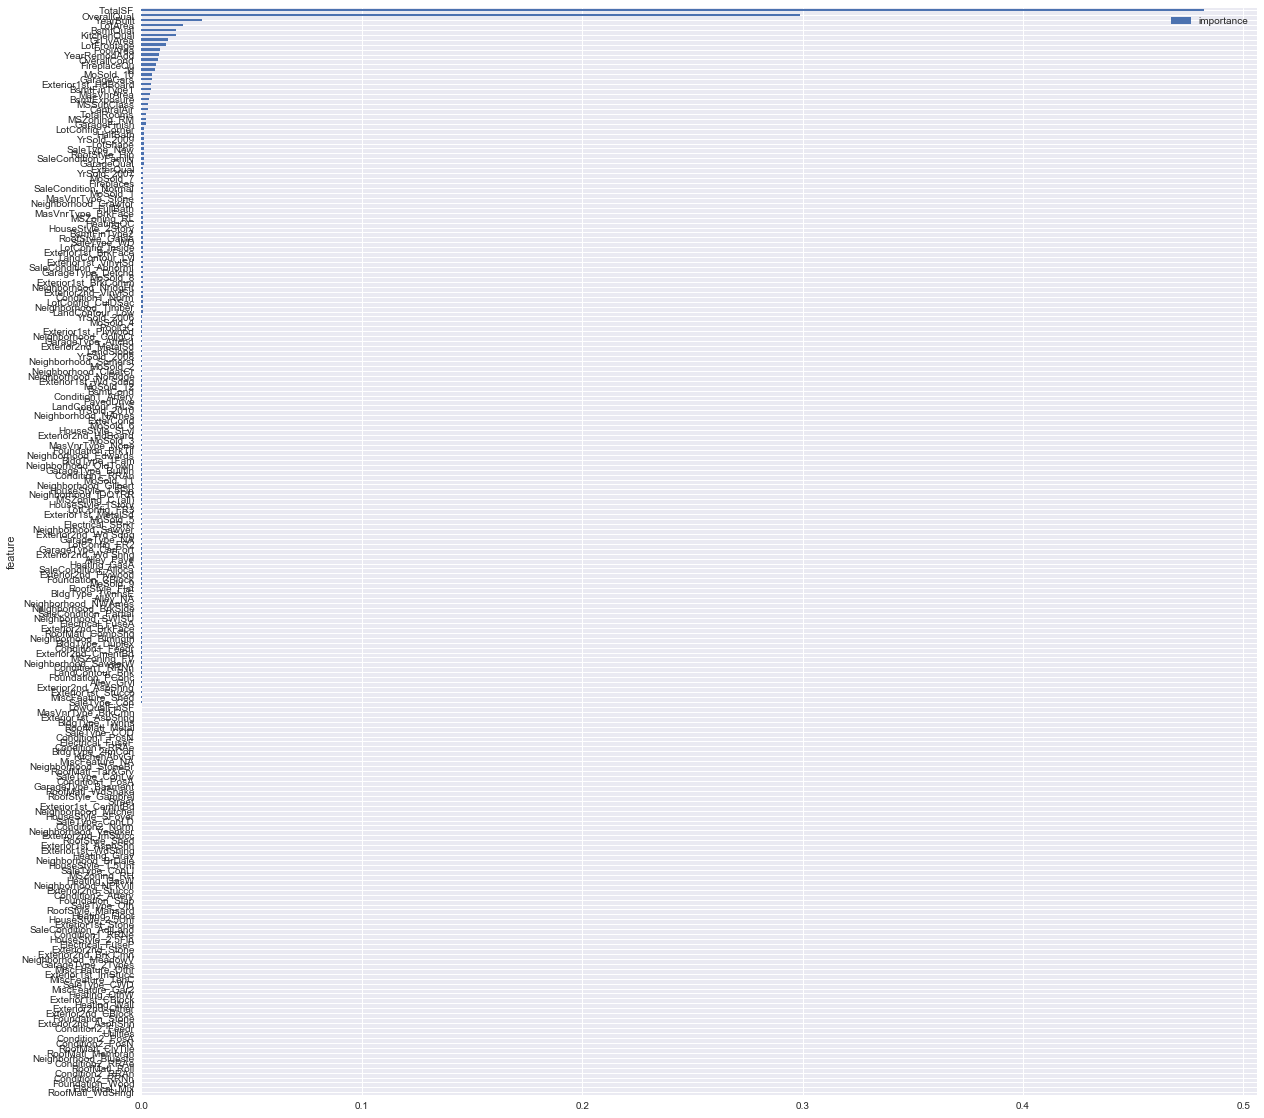

In [24]:
features = pd.DataFrame()
features['feature'] = x_train.columns
features['importance'] = regression_model.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(20, 20))

In [25]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.cross_validation import cross_val_score

F:\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
model = SelectFromModel(regression_model, prefit=True)
transform_data = model.transform(x_train)
transform_data.shape

(1460, 15)

In [27]:
cv_search = False
grid_model = RandomForestRegressor()

In [28]:
if cv_search == True :
    forest_params = {
        'n_estimators' : [5 , 10,50, 80],
        'max_features' : ['sqrt' , 'log2', 0.3 , 0.5],
        'max_depth' : [2, 5, 10],
        'min_samples_split' : [2 , 5 , 10],
        'min_samples_leaf' : [2 , 4 , 6],
        'bootstrap': [True, False],
    }
    cross_validation = StratifiedKFold(n_splits=5)
    grid_search = GridSearchCV(estimator=regression_model ,cv=cross_validation,param_grid=forest_params)
    grid_search.fit(transform_data,y_train)
    grid_model = grid_search.best_estimator_
else:
    best_params = {'bootstrap': False,
     'max_depth': 10,
     'max_features': 0.3,
     'min_samples_leaf': 2,
     'min_samples_split': 2,
     'n_estimators': 100}
    grid_model = RandomForestRegressor(**best_params)
    grid_model.fit(transform_data,y_train)

Accuracy on cross-validation

In [29]:
xval = cross_val_score(grid_model, transform_data , y_train,  cv = 5 )
print("Accuracy: %0.2f (+/- %0.2f)" % (xval.mean(), xval.std() * 2))

Accuracy: 0.87 (+/- 0.07)


In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split

In [31]:
X_train, X_cv, Y_train, Y_cv = train_test_split(transform_data, y_train, test_size=0.3, random_state=1)
Y_predict = grid_model.predict(X_cv)

In [32]:
mean_squared_error(Y_cv, Y_predict)

117723082.98018873

In [33]:
pd.DataFrame(Y_cv)

SalePrice
train 258    231500.0
      267    179500.0
      288    122000.0
      649     84500.0
      1233   142000.0
      167    325624.0
      926    285000.0
      831    151000.0
      1237   195000.0
      426    275000.0
      487    175000.0
      375     61000.0
      1126   174000.0
      53     385000.0
      1033   230000.0
      1022    87000.0
      1215   125000.0
      91      98600.0
      1270   260000.0
      680    143000.0
      464    124000.0
      1416   122500.0
      730    236500.0
      994    337500.0
      383     76000.0
      992    187000.0
      531    128000.0
      742    179000.0
      798    485000.0
      432    122500.0
      809    106000.0
      1029   118000.0
      194    127000.0
      1144    80000.0
      37     153000.0
      309    360000.0
      311    132000.0
      976     85500.0
      1043   262280.0
      1448   112000.0
      292    131000.0
      424    139000.0
      325     87000.0
      1069   135000.0
      1108   181000.0
      1006   163500.0
      1148   116900.0
      982    159895.0
      283    244600.0
      1253   294000.0
      259     97000.0
      304    295000.0
      268    120500.0
      1133   239500.0
      1074   194000.0
      107    115000.0
      1101   119500.0
      111    180000.0
      804    118000.0
      101    178000.0
      833    167000.0
      301    267000.0
      341     82000.0
      952    133900.0
      659    167000.0
      484    132500.0
      653    135000.0
      1057   248000.0
      1434   160000.0
      1053   144500.0
      1173   200500.0
      48     113000.0
      321    354000.0
      852    164000.0
      1076   170000.0
      819    224000.0
      1124   163900.0
      966    160000.0
      1373   466500.0
      443    172500.0
      80     193500.0
      584    133000.0
      587    137000.0
      1026   167500.0
      766    196500.0
      1093   146000.0
      1073   159500.0
      60     158000.0
      1210   189000.0
      891    172500.0
      597    194201.0
      810    181000.0
      140    115000.0
      1232   101800.0
      761    100000.0
      1274   139000.0
      1220   115000.0
      19     139000.0
      754    156000.0
      538    158000.0
      953    172000.0
      592    138000.0
      1408   125500.0
      1340   123000.0
      1113   134500.0
      735    163000.0
      922    169990.0
      3      140000.0
      840    140000.0
      1105   325000.0
      841    157500.0
      607    225000.0
      772    107000.0
      236    185500.0
      737    239900.0
      119    163990.0
      930    201000.0
      49     127000.0
      177    172500.0
      169    228000.0
      1377   117000.0
      824    232600.0
      231    403000.0
      104    169500.0
      1068   151400.0
      1146   180000.0
      644    370878.0
      812     55993.0
      685    207500.0
      572    224500.0
      408    280000.0
      1000    82000.0
      816    137000.0
      839    130500.0
      264     73000.0
      752    217000.0
      1169   625000.0
      1228   367294.0
      255    230000.0
      741    142000.0
      108    115000.0
      961    272000.0
      919    176500.0
      559    234000.0
      30      40000.0
      382    213500.0
      418    126000.0
      782    187100.0
      1338   200000.0
      931    117500.0
      780    176000.0
      857    174000.0
      223     97000.0
      1134   169000.0
      348    154000.0
      702    361919.0
      88      85000.0
      1221   134000.0
      750     96500.0
      1367   127000.0
      636     60000.0
      693    108480.0
      599    151000.0
      779    135000.0
      972     99500.0
      1418   124000.0
      1358   177500.0
      1269   144000.0
      330    119000.0
      535    107500.0
      158    254900.0
      1263   180500.0
      929    222000.0
      817    271000.0
      1260   181000.0
      1129   140000.0
      516    158000.0
      94     204750.0
      1010   135000.0
      785    161500.0
      679    128500.0
      70

In [34]:
pd.DataFrame(Y_predict)

,0
0,217982.995775
1,178025.368354
2,121702.770345
3,82019.969175
4,139748.619097
5,329212.041312
6,289951.726638
7,150355.591821
8,213685.530379
9,244478.125844


In [49]:
test_transform = model.transform(x_test)
test_transform.shape
y_predict = grid_model.predict(test_transform)

In [50]:
final_predict = pd.DataFrame({'Id': x_test['Id'], 'SalePrice': y_predict}).to_csv('M:\\Data Science\\House Prices\\output.csv', index =False)